# Aufgabe 13

## Simulationskette für Neutrinodetektor

### a) Signal MC

Fluss des Neutrinos:
$$ \Phi = \Phi_0 \cdot \left(\frac{E}{\mathrm{TeV}} \right)^{-\gamma} $$

$$ \tiny{\gamma = 2,7 \:,\: E_\text{unten} = 1 \mathrm{TeV} \:,\: E_\text{oben} = \infty} $$ 

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [8]:
gamma = 2.7
phi_0 = 1.7

def phi(x):
    return phi_0 * x**(-gamma)

def Phi(x):
    return phi_0/(gamma-1) * (1-x**(-(gamma-1)))

def Phi_inv(x):
    return 1/(1-x)**(1/(gamma-1))

x = np.linspace(1, 10, 1000)

#plt.plot(x, phi(x), 'b-', label=r'$\varphi(x)$')
#plt.plot(x, Phi(x), 'r-', label=r'$\Phi(x)$')
#plt.legend()
#plt.tight_layout()

In [15]:
np.random.seed(10)
r = np.random.uniform(0,1, 100000)

Energy = pd.DataFrame({'Energy': Phi_inv(r)})

#plt.hist(Phi_inv(r), bins='auto', density=True)
#plt.plot(x, phi(x), 'r-', label=r'$\varphi(x)$')
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(1, 10)
#plt.tight_layout()

### b) Akzeptanz

Die Wahrscheinlichkeit, ein Ereignis zu detektieren beträgt:
$$ P(E) = \left(1-e^{-E/2} \right)^3 $$

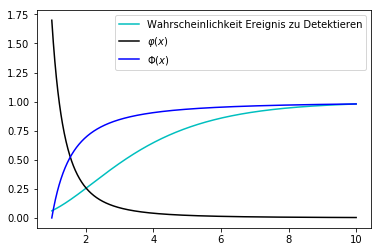

In [46]:
def P(x):
    return (1-np.exp(-x/2))**3

plt.plot(x, P(x), 'c-',label=r'Wahrscheinlichkeit Ereignis zu Detektieren')
plt.plot(x, phi(x), 'k-', label=r'$\varphi(x)$')
plt.plot(x, Phi(x), 'b-', label=r'$\Phi(x)$')
plt.legend()
#plt.tight_layout()

In [98]:
Acceptance = pd.DataFrame({'AcceptanceMask': 
                           Phi(Energy['Energy']) <= P(Energy['Energy'])})

blub = pd.concat([Energy, Acceptance], axis=1)

detect = 0
notdetect = 0
for xn in range(len(Acceptance)):
    if Acceptance.loc[xn, 'AcceptanceMask'] == True:
        #print(blub.loc[xn, 'Energy'])
        detect += 1
    else:
        notdetect += 1

detect, notdetect

(8826, 91174)

# TEST

In [6]:
df = pd.DataFrame({'A': 'foo bar foo bar foo bar foo foo'.split(),
                   'B': 'one one two three two two one three'.split(),
                   'C': np.arange(8), 'D': np.arange(8) * 2})

df

,A,B,C,D
0,foo,one,0,0
1,bar,one,1,2
2,foo,two,2,4
3,bar,three,3,6
4,foo,two,4,8
5,bar,two,5,10
6,foo,one,6,12
7,foo,three,7,14


In [7]:
df.loc[df['B'] == 'two']

,A,B,C,D
2,foo,two,2,4
4,foo,two,4,8
5,bar,two,5,10


In [8]:
test = pd.DataFrame({'month': [1, 4, 7, 10],
                     'year': [2012, 2014, 2013, 2014],
                     'sale':[55, 40, 84, 31]})

test2 = pd.DataFrame(['a', 'b', 'c', 'd'])
test3 = pd.DataFrame(['f', 'g', 'h', 'i'])

test23 = pd.concat([test2, test3], keys=['Energy', 'Acceptance'], axis=1)
testtest = test23.Acceptance == 'f'

#test23.append(testtest)
#pd.concat([test23, testtest], axis=1)

(array([0.07952797, 0.15905595, 0.25846592, 0.41255137, 0.43740386,
        0.45728585, 0.50202034, 0.41752187, 0.47716785, 0.53681383,
        0.37775788, 0.36781688, 0.26343642, 0.15408545, 0.06958698]),
 array([0.07932396, 0.28051103, 0.48169809, 0.68288516, 0.88407223,
        1.0852593 , 1.28644636, 1.48763343, 1.6888205 , 1.89000757,
        2.09119463, 2.2923817 , 2.49356877, 2.69475584, 2.8959429 ,
        3.09712997]),
 <a list of 15 Patch objects>)

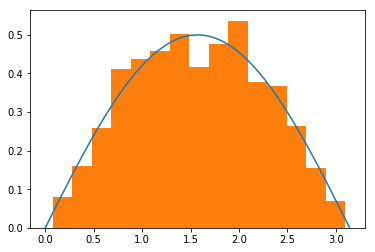

In [9]:
def f(x):
    return 1/2*np.sin(x)

def F(x):
    return 1-np.cos(x)

def Finv(x):
    return np.arccos(1-2*x)

x = np.linspace(0,np.pi,100)
r = np.random.uniform(0,1,1000)

plt.plot(x,f(x))
#plt.plot(x,F(x))
plt.hist(Finv(r), bins='auto', density='True')